In [ ]:

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
from google.colab import files


In [ ]:
!pip install bertopic
!pip install gensim
!pip install wordcloud
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import pandas as pd
import io


In [ ]:
!pip install preprocessor
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import preprocessor as p

In [ ]:
with open('/content/gdrive/My Drive/11to14.csv', 'r') as f:
  df = pd.read_csv(f,nrows=28000)



In [ ]:

df.drop_duplicates(subset=['url'],keep = 'first',inplace=True)
def clean_tweet(tweet):
    p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )
    # Use preprocessor to clean the tweet
    cleaned_tweet = p.clean(tweet)
    return cleaned_tweet
def partial_clean(tweet):
    p.set_options(p.OPT.URL,p.OPT.MENTION)
    # Use preprocessor to clean the tweet
    cleaned_tweet = p.clean(tweet)
    return cleaned_tweet
df['mentioned_users'] = df['tweet_text'].str.extractall(r'@(\w+)')[0].groupby(level=0).agg(','.join)
df['partial_clean'] = df['tweet_text'].apply(partial_clean)
df['cleaned_text'] = df['tweet_text'].apply(clean_tweet)
df['cleaned_text'] = df['cleaned_text'].str.replace(r'#', '', regex=True)
df['cleaned_text'] = df['cleaned_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
display(df)

,tweet_text,user_id,hashtags,time,url,likes,Views,long,lat,mentioned_users,partial_clean,cleaned_text
0,@JennyLPuckett @RepMTG Did I get your goat? Fe...,1625283615826546688,NaN,2023-02-13 23:59:44 +0000 +0000,https://twitter.com/MonitorFake/status/1625283...,0,19,NaN,NaN,"JennyLPuckett,RepMTG",Did I get your goat? Feel annoyed? Now you kno...,did i get your goat feel annoyed now you know ...
1,40 years ago Australia was at the forefront of...,1625283594435579906,science,2023-02-13 23:59:39 +0000 +0000,https://twitter.com/Leel06Lee/status/162528359...,0,12,NaN,NaN,CosmosMagazine,40 years ago Australia was at the forefront of...,years ago australia was at the forefront of cl...
2,Bill Gates Turns Attention To Eliminating 'Mis...,1625283561124233218,NaN,2023-02-13 23:59:31 +0000 +0000,https://twitter.com/ArthurTerry2020/status/162...,6,207,NaN,NaN,NaN,Bill Gates Turns Attention To Eliminating 'Mis...,bill gates turns attention to eliminating misi...
3,@CollinRugg The WEF directly said they would u...,1625283560683843584,NaN,2023-02-13 23:59:31 +0000 +0000,https://twitter.com/BlueCoast18/status/1625283...,0,9,NaN,NaN,CollinRugg,The WEF directly said they would use climate c...,the wef directly said they would use climate c...
4,Spain is the world's third largest producer of...,1625283482728693760,NaN,2023-02-13 23:59:13 +0000 +0000,https://twitter.com/HeideSunny/status/16252834...,0,6,NaN,NaN,NaN,Spain is the world's third largest producer of...,spain is the world s third largest producer of...
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,@The_Trump_Train Climate change is nothing mor...,1624486967281852417,NaN,2023-02-11 19:14:09 +0000 +0000,https://twitter.com/KarlFranke6/status/1624486...,0,9,NaN,NaN,The_Trump_Train,Climate change is nothing more then a lie to f...,climate change is nothing more then a lie to f...
27996,@Joey_Bagadohnut @Rainmaker1973 homie there’s ...,1624486967072227330,NaN,2023-02-11 19:14:09 +0000 +0000,https://twitter.com/vik_the_wicked/status/1624...,1,115,NaN,NaN,"Joey_Bagadohnut,Rainmaker1973",homie there’s 8 BILLION of us burning plastic ...,homie theres billion of us burning plastic amp...
27997,@The_Trump_Train The climate changes every sin...,1624486955298816005,NaN,2023-02-11 19:14:06 +0000 +0000,https://twitter.com/Barchy4T/status/1624486955...,0,3,NaN,NaN,The_Trump_Train,The climate changes every single day. To make ...,the climate changes every single day to make t...
27998,"kiwis are alright i guess, but whats better is...",1624486945996034048,NaN,2023-02-11 19:14:04 +0000 +0000,https://twitter.com/tuitalks/status/1624486945...,0,1,NaN,NaN,NaN,"kiwis are alright i guess, but whats better is...",kiwis are alright i guess but whats better is ...


In [ ]:

from bertopic import BERTopic
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from bertopic.representation import KeyBERTInspired
from bertopic.representation import PartOfSpeech
from bertopic.representation import MaximalMarginalRelevance

In [ ]:

vectorizer_model = CountVectorizer(stop_words="english")
main_representation = KeyBERTInspired()
aspect_model1 = PartOfSpeech("en_core_web_sm")
aspect_model2 = [KeyBERTInspired(top_n_words=30), MaximalMarginalRelevance(diversity=.5)]
representation_model = {
   "Main": main_representation,
   "Aspect1":  aspect_model1,
   "Aspect2":  aspect_model2
}
model = BERTopic(verbose=True,vectorizer_model=vectorizer_model,representation_model=representation_model,calculate_probabilities=True)
doc = df.partial_clean.to_list()
timestamps = df.time.to_list()
topics, probs = model.fit_transform(doc)

Batches:   0%|          | 0/862 [00:00<?, ?it/s]

2023-06-09 02:50:21,457 - BERTopic - Transformed documents to Embeddings
2023-06-09 02:51:28,068 - BERTopic - Reduced dimensionality
2023-06-09 02:59:38,478 - BERTopic - Clustered reduced embeddings


In [ ]:
probs_df=pd.DataFrame(probs)
probs_df['main percentage'] = pd.DataFrame({'max': probs_df.max(axis=1)})

display(probs_df)

,0,1,2,3,4,5,6,7,8,9,...,378,379,380,381,382,383,384,385,386,main percentage
0,0.001784,0.002663,0.001016,0.002093,0.001322,0.001319,0.004764,0.001196,0.002120,0.001176,...,0.001272,0.002046,0.003026,0.001395,0.001724,0.001551,0.001469,0.001550,0.002489,0.133085
1,0.000451,0.000677,0.000417,0.000549,0.000448,0.000570,0.000549,0.001317,0.000583,0.000853,...,0.000556,0.000754,0.000847,0.000980,0.001358,0.001477,0.000542,0.000516,0.000504,0.007574
2,0.000684,0.002134,0.000755,0.001153,0.000544,0.000657,0.001133,0.000696,0.001304,0.000890,...,0.000947,0.000723,0.000811,0.000897,0.000753,0.000749,0.000539,0.000550,0.000720,0.571679
3,0.003450,0.002904,0.001088,0.004419,0.001939,0.002243,0.004089,0.001496,0.002822,0.001662,...,0.001527,0.002866,0.003070,0.002099,0.002130,0.001954,0.001621,0.001807,0.003527,0.169772
4,0.000875,0.000771,0.000558,0.000877,0.001029,0.001195,0.000803,0.002028,0.000748,0.001433,...,0.000723,0.001449,0.001363,0.001547,0.002020,0.002040,0.001292,0.001177,0.000932,0.021058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27566,0.000833,0.000577,0.000217,0.000827,0.000449,0.000436,0.000875,0.000319,0.000463,0.000309,...,0.000292,0.000612,0.000710,0.000394,0.000454,0.000413,0.000382,0.000435,0.001190,0.007388
27567,0.002195,0.001679,0.000831,0.002665,0.002168,0.003648,0.001857,0.002748,0.001582,0.002647,...,0.001347,0.005078,0.003873,0.005275,0.005224,0.004780,0.002068,0.002147,0.002308,0.021974
27568,0.000688,0.000909,0.000690,0.000755,0.000719,0.000772,0.000868,0.001291,0.000773,0.000823,...,0.000798,0.001195,0.001584,0.000951,0.001713,0.001683,0.001156,0.001036,0.000848,0.020515
27569,0.000377,0.000377,0.000275,0.000342,0.000451,0.000454,0.000348,0.000730,0.000365,0.000456,...,0.000320,0.000541,0.000512,0.000481,0.000653,0.000684,0.000569,0.000524,0.000404,0.025009


In [ ]:
model.get_topic_info()

,Topic,Count,Name,Representation,Aspect1,Aspect2,Representative_Docs
0,-1,10305,-1_climatechange_climate_warming_climateaction,"[climatechange, climate, warming, climateactio...","[climate, change, people, climatechange, globa...","[climatechange, warming, globalwarming, enviro...","[Climate “change”, Climate will change afterwa..."
1,0,540,0_climate_warming_anthropogenic_real,"[climate, warming, anthropogenic, real, nature...","[real, man, humans, years, earth, natural, pla...","[climate, warming, anthropogenic, nature, hoax...","[Is climate change real?, But climate change i..."
2,1,523,1_climate_trump_hypocrite_guy,"[climate, trump, hypocrite, guy, believes, twe...","[guy, change, hypocrite, climate, problem, exp...","[climate, trump, hypocrite, tweets, carl, scie...",[hes looking into a world without climate chan...
3,2,375,2_climate_hillary_hilary_clinton,"[climate, hillary, hilary, clinton, ban, hilla...","[hot, air, time, change, climate, country, fan...","[climate, ban, clintons, breitbart, jill, kama...",[How about we ban Hillary to 'fight climate ch...
4,3,257,3_climate_scam_scamming_scams,"[climate, scam, scamming, scams, scammers, sca...","[scam, scams, biggest, scammers, sociopaths, h...","[climate, scamming, weatherwarfare, lottery, c...","[Climate change scam, Climate change is a scam..."
...,...,...,...,...,...,...,...
383,382,10,382_climatechange_climatejusticenow_sustainabl...,"[climatechange, climatejusticenow, sustainable...","[eve, aliyah, blogs, hrs, simplified, planet, ...","[climatejusticenow, sustainable, earth, eve, c...",[Want to HELP SAVE the PLANET? WILL you unplug...
384,383,10,383_warming_climateaction_climatechange_climate,"[warming, climateaction, climatechange, climat...","[savetheplanet, generations, urgent, threat, p...","[warming, climateaction, globalwarming, enviro...",[Global warming is a real and urgent threat to...
385,384,10,384_climate_weather_change_hot,"[climate, weather, change, hot, cycles, damn, ...","[button, arse, shirt, red, black, cycles, hot,...","[climate, change, hot, cycles, red, cus, butto...","[Damn you climate change!, Lmao climate change..."
386,385,10,385_climate_change_anecdotal_science,"[climate, change, anecdotal, science, natural,...","[anecdotal, disappointed, exaggerated, events,...","[climate, anecdotal, science, natural, events,...",[And not climate change? I am so disappointed....


In [ ]:
model.get_topic(0)
# why this is more important than others ? Critiria needed.

[('climate', 0.5563024),
 ('warming', 0.462091),
 ('anthropogenic', 0.37406343),
 ('real', 0.3533349),
 ('nature', 0.29975498),
 ('hoax', 0.29466015),
 ('earth', 0.2814253),
 ('weather', 0.2770387),
 ('changing', 0.27690524),
 ('change', 0.27332103)]

In [ ]:
model.visualize_barchart()

In [ ]:
hierarchical_topics =model.hierarchical_topics(doc)

100%|██████████| 386/386 [04:32<00:00,  1.42it/s]


In [ ]:

model.visualize_hierarchy(hierarchical_topics=hierarchical_topics,top_n_topics = 30)

In [ ]:
import matplotlib.pyplot as plt


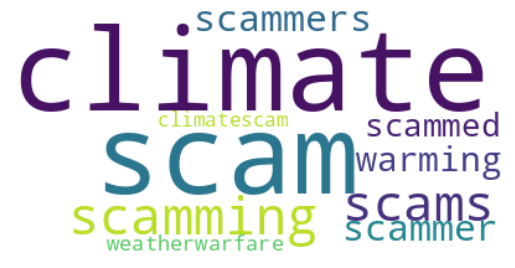

In [ ]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(model, topic=3)

In [ ]:
topics_over_time = model.topics_over_time(doc, timestamps, nr_bins=20)

20it [25:52, 77.61s/it]


In [ ]:
model.visualize_topics_over_time(topics_over_time, topics=[0,1,2,3])

In [ ]:
model.visualize_heatmap(topics = [0,1,2,3,4,5],n_clusters=5)
# why similar / significance ?